In [226]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [178]:
from pathlib import Path

data_dir = Path('data')
train_data = pd.read_csv(data_dir / 'train.csv')
test_data = pd.read_csv(data_dir / 'test.csv')

train_data.shape

(42000, 785)

In [303]:
from tensorflow.random import set_seed 
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

early_stopping

def prepage_input_shape(data: pd.DataFrame):
    return data.values.reshape(-1, 28, 28)


model = keras.Sequential()
model.add(Conv2D(
              1, 
              kernel_size=4,
              activation='relu',
              input_shape=(28, 28, 1)
            )
         )
model.add(Conv2D(
              1, 
              kernel_size=4,
              activation='sigmoid',
              input_shape=(28, 28, 1)
            )
         )
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_hinge', metrics=['accuracy'])

y = to_categorical(train_data.label.values) # one-hot encode target 
X = prepage_input_shape(train_data.drop('label', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.005,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=[X_test, y_test],
                    callbacks=[early_stopping])

Epoch 1/50
985/985 [==============================] - 6s 5ms/step - loss: 0.6084 - accuracy: 0.6876 - val_loss: 0.3125 - val_accuracy: 0.8724
Epoch 2/50
985/985 [==============================] - 5s 5ms/step - loss: 0.2630 - accuracy: 0.8911 - val_loss: 0.2340 - val_accuracy: 0.9020
Epoch 3/50
985/985 [==============================] - 5s 6ms/step - loss: 0.2142 - accuracy: 0.9094 - val_loss: 0.2092 - val_accuracy: 0.9063
Epoch 4/50
985/985 [==============================] - 6s 6ms/step - loss: 0.1927 - accuracy: 0.9167 - val_loss: 0.1878 - val_accuracy: 0.9161
Epoch 5/50
985/985 [==============================] - 5s 6ms/step - loss: 0.1797 - accuracy: 0.9211 - val_loss: 0.1877 - val_accuracy: 0.9135
Epoch 6/50
985/985 [==============================] - 6s 6ms/step - loss: 0.1697 - accuracy: 0.9257 - val_loss: 0.1766 - val_accuracy: 0.9180
Epoch 7/50
985/985 [==============================] - 5s 6ms/step - loss: 0.1628 - accuracy: 0.9281 - val_loss: 0.1704 - val_accuracy: 0.9205
Epoch 

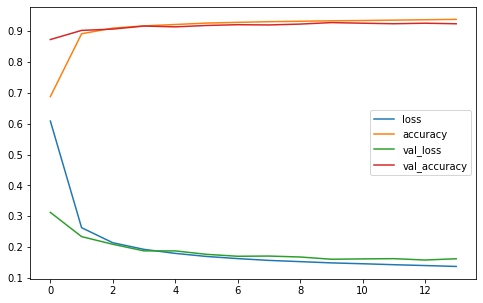

In [304]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [320]:
import csv
from typing import List

# Submittion Format:
# ImageId,Label
# 1,3
# 2,7
# 3,8 
# (27997 more lines)

def prepare_preds_for_submission(predictions: List[int]):
    fields = ['ImageId', 'Label']
    # data rows of csv file
    predictions = [x.argmax() for x in predictions]
    rows = enumerate(predictions, start=1)

    with open('submission.csv', 'w') as f:
        write = csv.writer(f)
        write.writerow(fields)
        write.writerows(rows)

test_predictions = model.predict(prepage_input_shape(test_data))
prepare_preds_for_submission(test_predictions)
pd.read_csv('submission.csv')
# [x.argmax() for x in test_predictions]

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [314]:
size = 7

targets = [x.argmax() for x in y_test[:size]]
preds = [x.argmax() for x in model.predict(X_test[:size])]

# targets = [x.argmax() for x in y_train[:size]]
# preds = [x.argmax() for x in model.predict(X_train[:size])]

for _ in zip(targets, preds):
    print(_)
targets == preds

(8, 8)
(1, 1)
(9, 9)
(9, 9)
(8, 8)
(6, 5)
(2, 2)


False

In [300]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
